# INF367 - Project 2

- Deadline: Sunday, 17.11.19, 23.59
- Submission details: Jupyter-notebook
- Deliver here [MittUIB.no/assignments](MittUIB.no/assignments)

Projects are a compulsory part of the course. This project contributes 20% to the final grade. The grade will be based good choice of methods, correctness of answers, clarity of code and thoroughness and clarity of reporting. 

*Deliverables:* A jupyter notebook containing all the code to reproduce your work and a report of all your methodological choices and results. Please "restart and run all" before submission, so that you submit a clean version. 

Code should be documented and special tricks (e.g. to avoid division by zero, to make sure it takes finite time to run, etc.) should be reported. The rational behind all steps in the code should be clear from the report. In particular, if you use subsampling, you should report it, and you should consider for each step how much subsampling is appropriate. 

**NOTE:** This project is a learning experience. If we see that you have copied your answers from online resources, you will get 0 points. 
This is an application project, that means you may use any freely available library for the application tasks of the project.  

Model selection is an important part of the task and will be graded accordingly. Before applying machine learning algorithms, you should always consider (and report) what results you expect. When you have successfully applied machine learning algorithms, you should always comment on how well the results match your expectations. 

## Task 1 - Preprocessing 
(10 points)

In the next task, you will prepare the mass cytometry dataset for analysis. 

The datasets contain information on 20,000 blood cells of 20 rheumatoid arthritis patients and 20 healthy controls. The first two columns identify the patient and the patient group. The remaining columns are the cell markers measured. 

In this task you summarize and visualize the data and prepare it for analysis. 

- Check for any missing values and handle these appropriately.
- Find the ranges and basic statistics of the features and rescale them if appropriate. For similar data, scaling using `arcsinh(x/5)` has been used successfully. 
- Visualize the univariate densities of all features using your favorite density estimator.
- Calculate basic bivariate statistics, such as correlations. 
- Perform any other appropriate preprocessing steps. 
- Discuss the results of your summaries and visualization efforts and explain your preprocessing choices (not doing any preprocessing is also a choice). 

### Data loading and exploration

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import scipy

np.random.seed(42)

<IPython.core.display.Javascript object>

In [3]:
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

plt.rcParams["figure.figsize"] = (15, 5)
%matplotlib inline

<IPython.core.display.Javascript object>

In [5]:
data_frame = pd.read_csv("cell_data.csv")

<IPython.core.display.Javascript object>

In [6]:
data_frame[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,0.000,131.332001,35.242001,5.460,13.194000,0.000,0.0,0.0,0.000,0.00,0.0,0.0
1,1,control,0.000,442.416992,34.754002,0.000,199.770996,0.000,0.0,0.0,0.000,1.06,0.0,0.0
2,1,control,0.489,252.893005,38.896000,1.158,115.276001,0.605,0.0,0.0,1.077,0.00,0.0,0.0
3,1,control,0.000,438.648987,43.154999,3.116,56.352001,0.000,0.0,0.0,0.000,0.00,0.0,0.0
4,1,control,0.000,195.774002,16.608999,0.000,3.942000,0.000,0.0,0.0,0.000,0.00,0.0,0.0


<IPython.core.display.Javascript object>

In [7]:
data_frame.shape

(800000, 14)

<IPython.core.display.Javascript object>

* Because we have little knowledge about the features and their actual meaning, the first step would be to find more information about this problematic.
* After further exploration, I found that data are probably coming from the study *Candidate Markers for Stratification and Classification in Rheumatoid Arthritis*([link](https://www.frontiersin.org/articles/10.3389/fimmu.2019.01488/full)).
* From the article, we could find that:
    * "Using mass cytometry, up to 50 markers can be simultaneously analyzed with single cell resolution with relatively **little signal overlap** and **very low background noise**"
        * this could be valuable for data preprocessing and choosing of method
    * "Twenty healthy donors (HD, 4 male, 16 female, ages 39–67) and 20 RA patients (4 male, 16 female, ages 31–76)"
        * this could be valuable for cluster sizes

### Checking missing values

In [8]:
all(data_frame.isnull().sum() == 0)

True

<IPython.core.display.Javascript object>

There are no missing values in dataset

### Samplling dataset

Same number of values id: True
Same number of values group: True


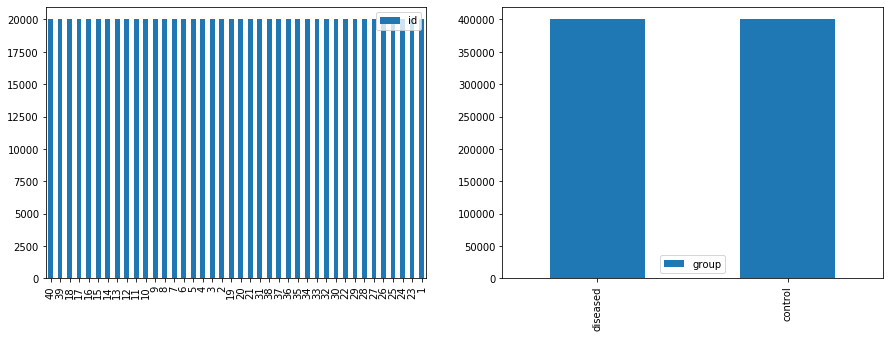

<IPython.core.display.Javascript object>

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for index, ax in zip(["id", "group"], axs):
    counts = data_frame[[index]].apply(pd.value_counts)

    count_values = counts.values.flatten()

    print(f"Same number of values {index}: {np.all(count_values == count_values[0])}")

    counts.plot(ax=ax, kind="bar")

plt.show()

In [10]:
sampled_frame = data_frame.sample(5000, random_state=42)

<IPython.core.display.Javascript object>

group KS test p-value: 1.00e+00
id KS test p-value: 6.58e-05


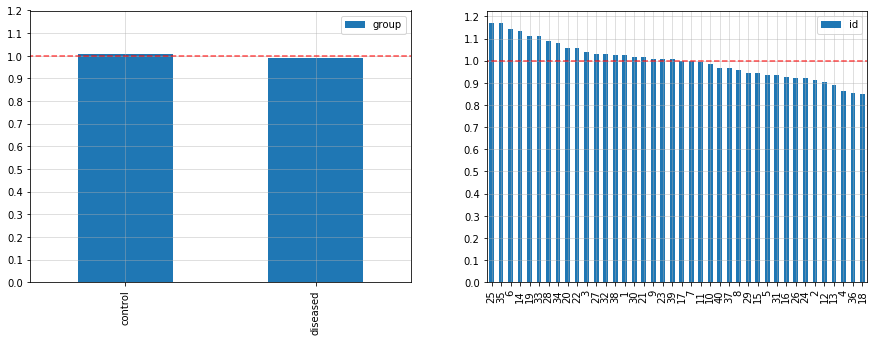

<IPython.core.display.Javascript object>

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for index, ax in zip(["group", "id"], axs):
    labels = np.unique(sampled_frame[index])

    counts = sampled_frame[[index]].apply(pd.value_counts) / (
        sampled_frame.shape[0] / labels.shape[0]
    )

    ax.hlines(
        1.0, -10, labels.shape[0], color="r", linestyle="--", alpha=0.7,
    )

    count_values = counts.values.flatten()
    ks_test = scipy.stats.ks_2samp(
        np.full(shape=count_values.shape, fill_value=1.0,), count_values,
    )

    print(f"{index} KS test p-value: {ks_test.pvalue:.2e}")

    counts.plot(ax=ax, kind="bar")

    ax.grid(alpha=0.5)
    ax.set_yticks(np.arange(0, 1.3, 0.1))


plt.show()

* we could see that our sampled data frame is not bad for groups, but it's not particularly good for ids

### Basic statistics for whole dataset and each group

In [12]:
all_features = np.array([x for x in data_frame.columns if x not in {"id", "group"}])
all_features

array(['147Sm_CD20', '170Er_CD3', '145Nd_CD4', '146Nd_CD8a',
       '169Tm_CD45RA', '176Yb_CD56', '148Nd_CD16', '160Gd_CD14',
       '209Bi_CD61', '159Tb_CD11c', '151Eu_CD123', '174Yb_HLA-DR'],
      dtype='<U12')

<IPython.core.display.Javascript object>

In [13]:
desc = data_frame[all_features].describe()
for indexes in np.array_split(desc.columns, 2):
    display(HTML(desc[indexes].to_html()))

,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.071812,116.282667,14.654339,66.665835,66.690869,13.648552
std,6.750842,107.193409,19.038641,176.118600,125.797889,56.528820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.104000,0.000000,0.000000,0.150000,0.000000
50%,0.000000,111.097000,2.326000,1.954000,10.253000,0.109000
75%,0.000000,187.037003,28.202000,17.595500,79.177252,3.168000
max,3248.843994,1093.625000,2426.083008,34624.800781,6391.654785,2526.949951


,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,0.604842,5.170937,19.251019,22.061555,1.067191,50.594894
std,16.301034,19.063708,90.727504,70.124454,8.362124,156.139429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.563000,2.048000,0.000000,5.779000
max,8545.107422,910.487976,31042.130859,2897.091064,466.604004,17494.880859


<IPython.core.display.Javascript object>

In [14]:
desc_healthy = data_frame[data_frame.group == "control"][all_features].describe()
desc_diseased = data_frame[data_frame.group == "diseased"][all_features].describe()

desc_all = desc_healthy.join(desc_diseased, lsuffix="_healthy", rsuffix="_diseased")

for indexes in np.array_split(sorted(desc_all.columns), 4):
    display(HTML(desc_all[indexes].to_html()))

,145Nd_CD4_diseased,145Nd_CD4_healthy,146Nd_CD8a_diseased,146Nd_CD8a_healthy,147Sm_CD20_diseased,147Sm_CD20_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,14.788904,14.519775,64.294070,69.037601,1.090776,1.052849
std,19.211705,18.863052,176.538617,175.665779,5.912088,7.496288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.511000,2.164000,1.820000,2.099000,0.000000,0.000000
75%,28.291000,28.110001,10.189000,33.361251,0.000000,0.000000
max,2426.083008,1599.675049,34624.800781,26474.210938,886.323975,3248.843994


,148Nd_CD16_diseased,148Nd_CD16_healthy,151Eu_CD123_diseased,151Eu_CD123_healthy,159Tb_CD11c_diseased,159Tb_CD11c_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,0.579064,0.630621,0.984213,1.150169,23.919226,20.203884
std,13.912753,18.381568,7.387680,9.233570,71.136080,69.048147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,2.667000,1.586000
max,8545.107422,6897.581055,308.287994,466.604004,2594.623047,2897.091064


,160Gd_CD14_diseased,160Gd_CD14_healthy,169Tm_CD45RA_diseased,169Tm_CD45RA_healthy,170Er_CD3_diseased,170Er_CD3_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,6.666752,3.675122,60.478957,72.902780,113.281274,119.284059
std,22.324204,14.966823,119.517202,131.486577,107.126398,107.176493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003000,0.322000,0.787000,1.529000
50%,0.000000,0.000000,7.989000,13.429000,106.809498,115.130497
75%,0.034000,0.000000,68.154249,90.639750,184.473255,189.501007
max,910.487976,361.449005,6391.654785,4860.277832,1093.625000,1057.531982


,174Yb_HLA-DR_diseased,174Yb_HLA-DR_healthy,176Yb_CD56_diseased,176Yb_CD56_healthy,209Bi_CD61_diseased,209Bi_CD61_healthy
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,54.839052,46.350736,12.696871,14.600232,21.494132,17.007906
std,160.788406,151.228855,50.833889,61.685714,85.868375,95.286618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.305000,0.000000,0.000000,0.000000
75%,9.963000,3.872000,3.392000,2.900000,0.787000,0.370000
max,5483.747070,17494.880859,2121.256104,2526.949951,8891.469727,31042.130859


<IPython.core.display.Javascript object>

#### Conclusions
* From the basic statistics we could see, that all values are $\geq 0$ and most of them are close to zero with a couple of outliers
* We can not see any obvious difference in groups

### Number of points in std range, histograms and box plots

In [15]:
means = data_frame[all_features].mean()
stds = data_frame[all_features].std()

<IPython.core.display.Javascript object>

In [16]:
pd.DataFrame(
    np.array(
        [
            (
                (
                    (data_frame[all_features] > means - i * stds)
                    & (data_frame[all_features] < means + i * stds)
                ).sum()
                / data_frame[all_features].shape[0]
            ).values
            for i in np.arange(0.5, 3.5, 0.5)
        ]
    ).T,
    columns=[f"std {i}" for i in np.arange(0.5, 3.5, 0.5)],
    index=data_frame[all_features].columns,
)

,std 0.5,std 1.0,std 1.5,std 2.0,std 2.5,std 3.0
147Sm_CD20,0.949431,0.962881,0.971495,0.978194,0.983348,0.987144
170Er_CD3,0.329881,0.516551,0.921767,0.965252,0.985419,0.993946
145Nd_CD4,0.153470,0.815921,0.905635,0.957576,0.982494,0.992994
146Nd_CD8a,0.821802,0.864818,0.919702,0.962460,0.985066,0.994801
169Tm_CD45RA,0.434746,0.892060,0.928380,0.952070,0.967480,0.977762
176Yb_CD56,0.913881,0.943000,0.962769,0.975615,0.983267,0.987672
148Nd_CD16,0.985891,0.995605,0.998244,0.999231,0.999607,0.999804
160Gd_CD14,0.914529,0.926033,0.938725,0.951066,0.962080,0.971321
209Bi_CD61,0.924289,0.942774,0.956640,0.967330,0.975372,0.981495
159Tb_CD11c,0.883651,0.911256,0.935404,0.954189,0.967867,0.977051


<IPython.core.display.Javascript object>

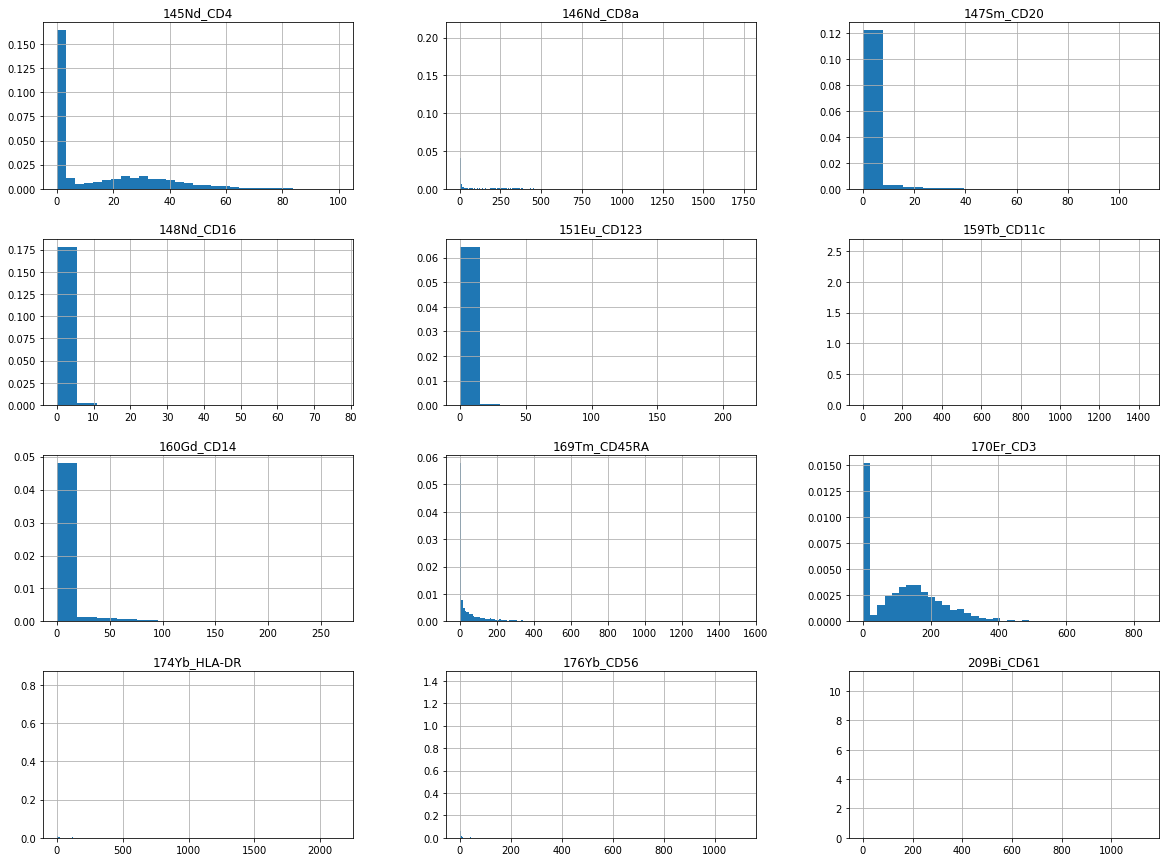

<IPython.core.display.Javascript object>

In [17]:
sampled_frame[all_features].hist(bins="auto", figsize=(20, 15), density=True)
plt.show()

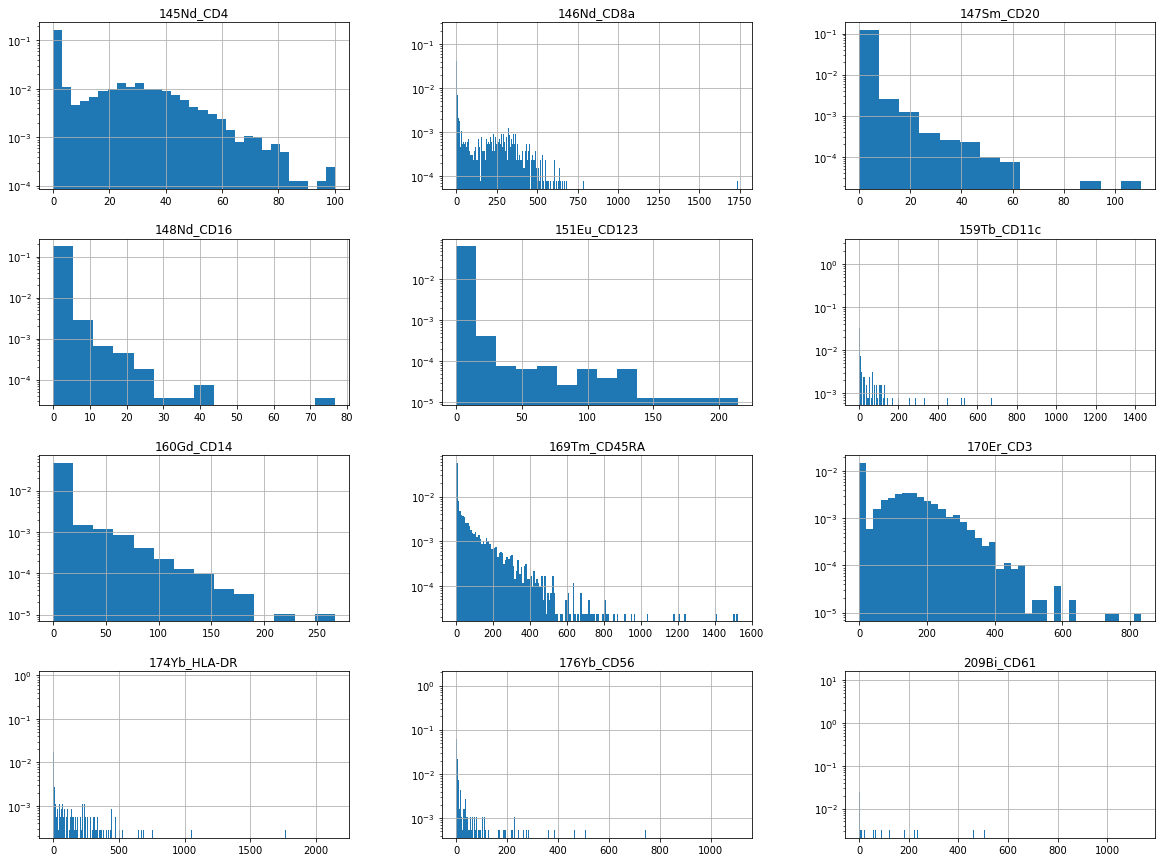

<IPython.core.display.Javascript object>

In [18]:
sampled_frame[all_features].hist(bins="auto", figsize=(20, 15), density=True, log=True)
plt.show()

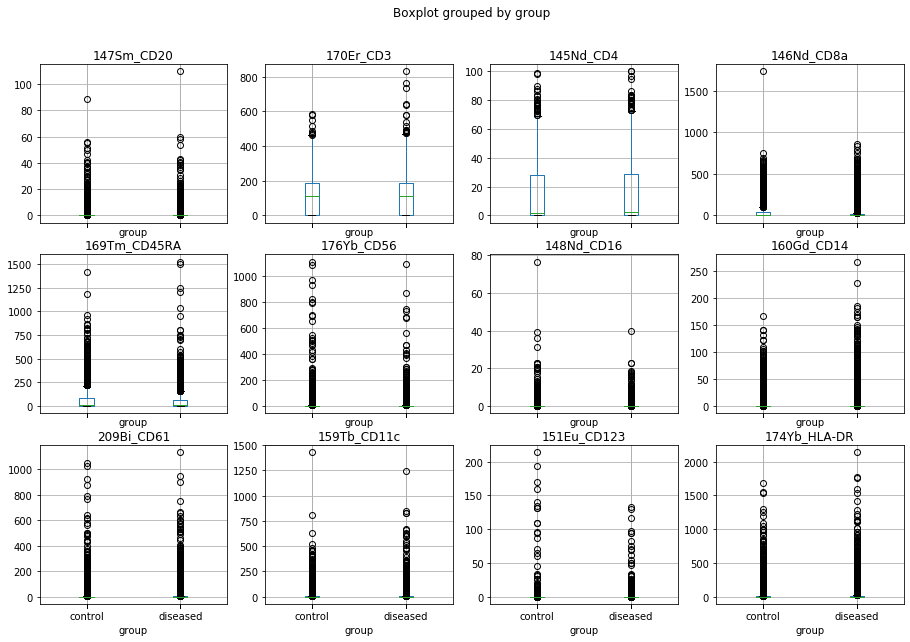

<IPython.core.display.Javascript object>

In [19]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True)

for r_idx, features in enumerate(np.array_split(all_features, 3)):
    for c_idx, feature in enumerate(features):
        sampled_frame.boxplot(feature, by="group", ax=axs[r_idx][c_idx])

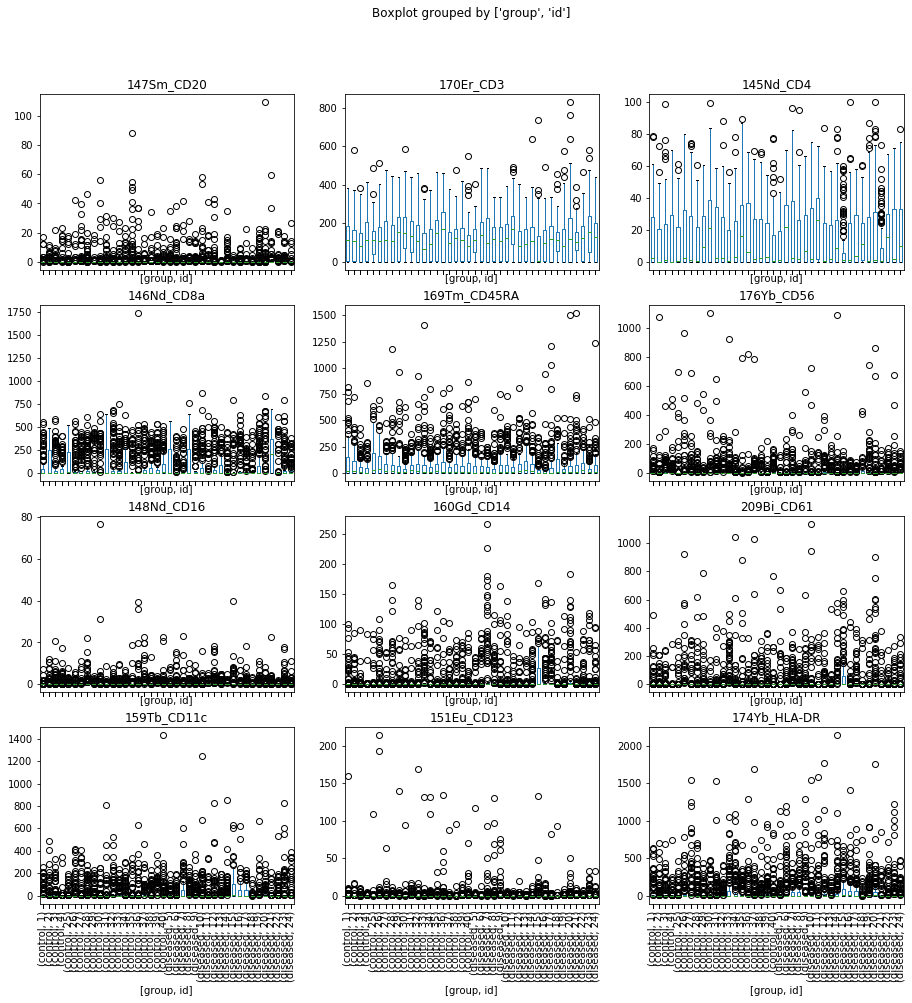

<IPython.core.display.Javascript object>

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15), sharex=True)

for r_idx, features in enumerate(np.array_split(all_features, 4)):
    for c_idx, feature in enumerate(features):
        sampled_frame.sort_values(by="group").boxplot(
            feature, by=["group", "id"], ax=axs[r_idx][c_idx], grid=False, rot=90
        )

#### Conclusion
* Features are centred close to zero
* We could see some small diferences in box plots

### Scaling

In [21]:
from sklearn.preprocessing import StandardScaler


def arcsinh_scale(x):
    return np.arcsinh(x / 5)

<IPython.core.display.Javascript object>

In [22]:
standard_scaled = pd.DataFrame(data_frame)
standard_scaled[all_features] = StandardScaler().fit_transform(
    standard_scaled[all_features]
)

standard_scaled[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,-0.158767,0.140394,1.081363,-0.347526,-0.425261,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037
1,1,control,-0.158767,3.042487,1.055731,-0.378528,1.057889,-0.241444,-0.037105,-0.271245,-0.212185,-0.299490,-0.127622,-0.324037
2,1,control,-0.086332,1.274429,1.273288,-0.371953,0.386216,-0.230742,-0.037105,-0.271245,-0.200314,-0.314606,-0.127622,-0.324037
3,1,control,-0.158767,3.007335,1.496991,-0.360836,-0.082186,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037
4,1,control,-0.158767,0.741570,0.102668,-0.378528,-0.498807,-0.241444,-0.037105,-0.271245,-0.212185,-0.314606,-0.127622,-0.324037


<IPython.core.display.Javascript object>

In [23]:
arcsin_scaled = pd.DataFrame(data_frame)
arcsin_scaled[all_features] = arcsin_scaled[all_features].apply(arcsinh_scale)

arcsin_scaled[:5]

,id,group,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
0,1,control,-0.031748,0.028075,0.214621,-0.069449,-0.084950,-0.048270,-0.007421,-0.054222,-0.042424,-0.062880,-0.025522,-0.064762
1,1,control,-0.031748,0.576098,0.209608,-0.075634,0.210030,-0.048270,-0.007421,-0.054222,-0.042424,-0.059862,-0.025522,-0.064762
2,1,control,-0.017266,0.252204,0.251983,-0.074322,0.077167,-0.046132,-0.007421,-0.054222,-0.040052,-0.062880,-0.025522,-0.064762
3,1,control,-0.031748,0.570082,0.295097,-0.072105,-0.016437,-0.048270,-0.007421,-0.054222,-0.042424,-0.062880,-0.025522,-0.064762
4,1,control,-0.031748,0.147776,0.020532,-0.075634,-0.099597,-0.048270,-0.007421,-0.054222,-0.042424,-0.062880,-0.025522,-0.064762


<IPython.core.display.Javascript object>

#### Conclustion
We prepared two scalings, we will try them later in clustering step

### Correlations

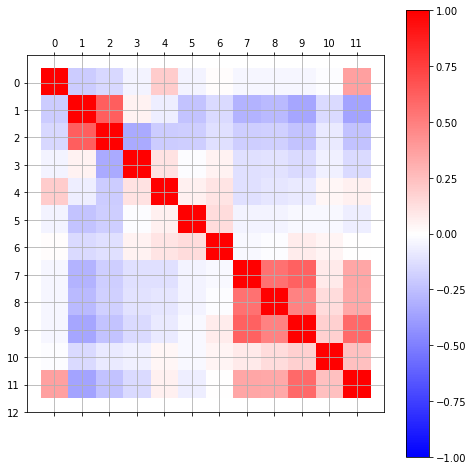

,170Er_CD3,145Nd_CD4,160Gd_CD14,209Bi_CD61,159Tb_CD11c,174Yb_HLA-DR
170Er_CD3,1,0.63,-0.29,-0.27,-0.35,-0.35
145Nd_CD4,0.63,1,-0.19,-0.18,-0.23,-0.23
160Gd_CD14,-0.29,-0.19,1,0.55,0.61,0.35
209Bi_CD61,-0.27,-0.18,0.55,1,0.49,0.34
159Tb_CD11c,-0.35,-0.23,0.61,0.49,1,0.58
174Yb_HLA-DR,-0.35,-0.23,0.35,0.34,0.58,1


<IPython.core.display.Javascript object>

In [24]:
corr = standard_scaled[all_features].corr()

fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, fignum=fig.number, cmap="bwr", vmin=-1, vmax=1)
plt.grid()
plt.colorbar()

plt.xticks(np.arange(0, all_features.shape[0], 1))
plt.yticks(np.arange(all_features.shape[0], -1, -1))

plt.xlim(-1, all_features.shape[0])
plt.ylim(all_features.shape[0], -1)

plt.show()

crt = np.sum(corr.abs() > 0.5, axis=0) > 1

corr_frame = corr[crt.index[crt]].loc[crt.values]

corr_frame.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2)

#### Conlusion
There are no significant correlations

## Task 2 - Dimensionality reduction
(15 points)

- Visualize the mass cytometry dataset using at least three different representation learning algorithms.
- Explain your choices of algorithms. 
- For each algorithm, explain your choice of parameters. 
- For each dimensionality reduction, describe the main features you see and discuss if these features come from the data or the dimensionality reduction technique.
- Discuss the differences and similarities of your dimensionality reductions. 

In [25]:
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

# Dissabling Numba warnning for UMAP (https://github.com/lmcinnes/umap/issues/252)
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [26]:
from tqdm.notebook import tqdm

<IPython.core.display.Javascript object>

In [27]:
methods = (
    ("PCA", PCA(n_components=2)),
    ("tSNE", TSNE(n_components=2, perplexity=30.0, random_state=42)),
    ("UMAP", UMAP(n_components=2, n_neighbors=30, random_state=42)),
)

<IPython.core.display.Javascript object>

In [28]:
transformed_data = {}

<IPython.core.display.Javascript object>

In [29]:
for name, method in tqdm(methods):
    transformed_data[name] = method.fit_transform(
        standard_scaled.iloc[sampled_frame.index][all_features]
    )

<IPython.core.display.Javascript object>

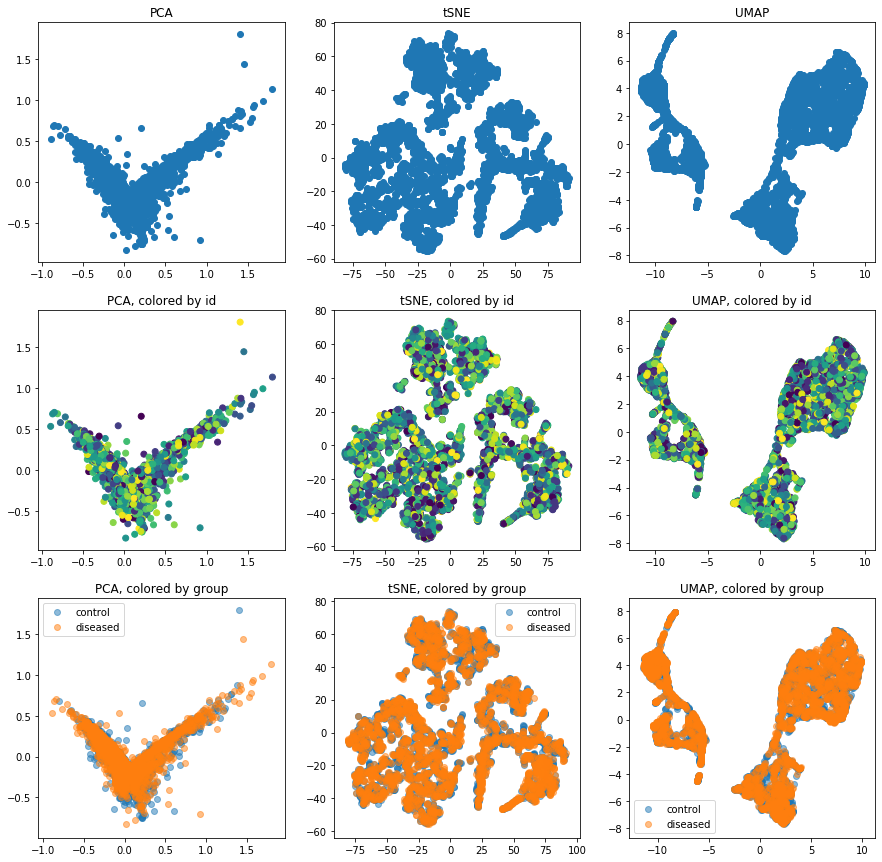

<IPython.core.display.Javascript object>

In [30]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, mt in zip(axs[0], transformed_data.items()):
    name, transformed = mt
    ax.scatter(transformed.T[0], transformed.T[1])
    ax.set_title(name)

for ax, mt in zip(axs[1], transformed_data.items()):
    name, transformed = mt
    ax.scatter(transformed.T[0], transformed.T[1], c=sampled_frame["id"])
    ax.set_title(f"{name}, colored by id")

for ax, mt in zip(axs[2], transformed_data.items()):
    name, transformed = mt

    labels = np.unique(sampled_frame["group"])

    for label in labels:

        ax.scatter(
            transformed[sampled_frame["group"] == label].T[0],
            transformed[sampled_frame["group"] == label].T[1],
            label=label,
            alpha=0.5,
        )
    ax.legend()
    ax.set_title(f"{name}, colored by group")

plt.show()

#### PCA explained variance


In [31]:
pca = PCA()

pca.fit(standard_scaled.iloc[sampled_frame.index][all_features])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<IPython.core.display.Javascript object>

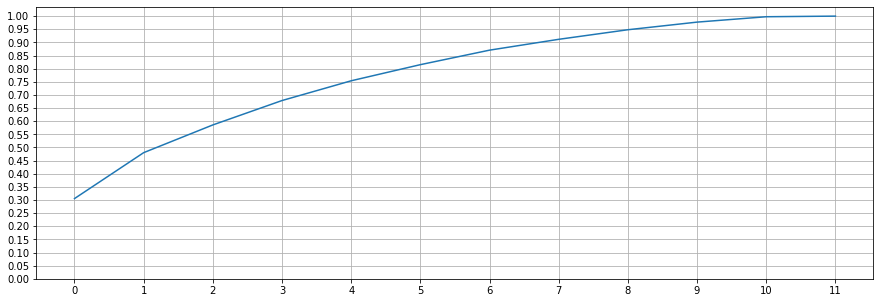

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(15, 5))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(0, pca.components_.shape[0]))

plt.grid()
plt.show()

In [33]:
umap = UMAP(n_components=2, n_neighbors=15, random_state=42)

<IPython.core.display.Javascript object>

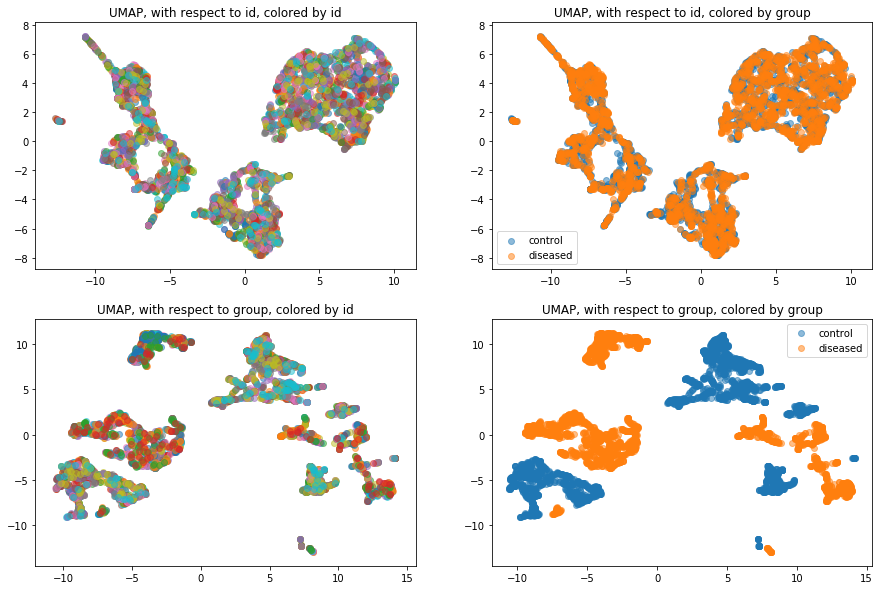

<IPython.core.display.Javascript object>

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, index in zip(axs, ["id", "group"]):
    encoder = LabelEncoder()
    y = encoder.fit_transform(sampled_frame[index])

    transformed = umap.fit_transform(
        StandardScaler().fit_transform(
            standard_scaled.iloc[sampled_frame.index][all_features]
        ),
        y=y,
    )

    for a, idx in zip(ax, ["id", "group"]):
        labels = np.unique(sampled_frame[idx])
        for label in labels:
            a.scatter(
                transformed[sampled_frame[idx] == label].T[0],
                transformed[sampled_frame[idx] == label].T[1],
                label=label,
                alpha=0.5,
            )
        if idx == "group":
            a.legend()
        a.set_title(f"UMAP, with respect to {index}, colored by {idx}")

plt.show()

In [35]:
from sklearn.model_selection import KFold

<IPython.core.display.Javascript object>

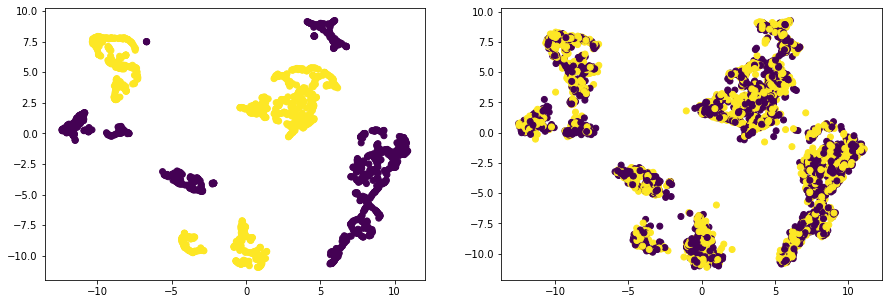

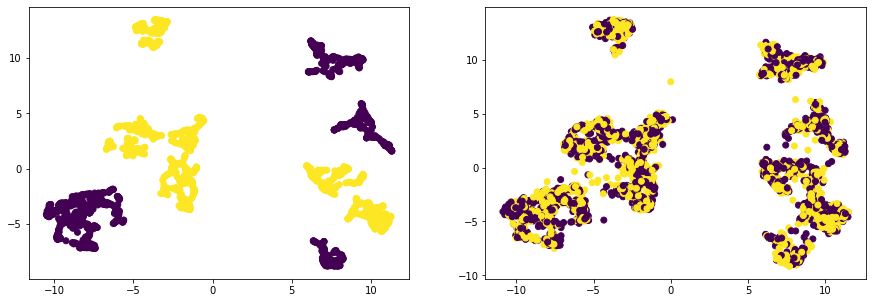

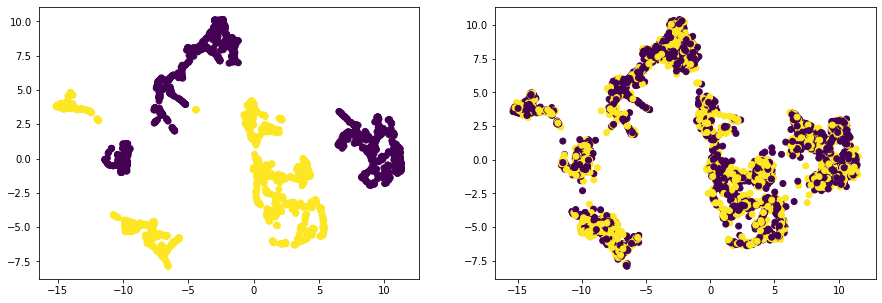

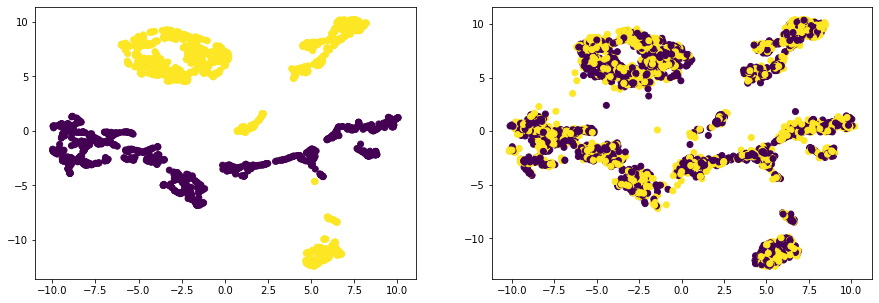

<IPython.core.display.Javascript object>

In [36]:
kfold = KFold(4, random_state=42, shuffle=True)
encoder = LabelEncoder()

for train_index, test_index in kfold.split(standard_scaled):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    umap = UMAP(n_components=2, n_neighbors=15, random_state=42)

    train_frame_sample = data_frame.iloc[train_index].sample(2000)
    test_frame_sample = data_frame.iloc[test_index].sample(5000)

    y = encoder.fit_transform(train_frame_sample["group"])

    train_transformed = umap.fit_transform(train_frame_sample[all_features], y=y)

    axs[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=y)

    test_transformed = umap.transform(test_frame_sample[all_features])

    axs[1].scatter(
        test_transformed[:, 0],
        test_transformed[:, 1],
        c=encoder.transform(test_frame_sample["group"]),
    )

    plt.show()

## Task 3 - Clustering

(25 points)

- Train at least five cluster algorithms discussed in class on the mass cytometry dataset.
- Explain your choices of algorithms. 
- For each algorithm, explain how your choice of parameters.
- Check the clustering performance using two different internal cluster validation measures (explain your choices).
- Discuss the performance (computation time, internal validation) of different methods. 
- Visualize the three best clusterings using the dimensionality reduction from above. Use the coordinates of the dimensionality reduction and color points by the cluster they belong to. Use a qualitative color scale. 
- Discuss how the dimensionality reduction and the clustering algorithms agree with each other. 

In [37]:
from sklearn.cluster import (
    KMeans,
    OPTICS,
    DBSCAN,
    SpectralClustering,
    AgglomerativeClustering,
    MeanShift,
)

from hdbscan import HDBSCAN

from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

from time import time

<IPython.core.display.Javascript object>

In [38]:
X = sampled_frame[all_features]

<IPython.core.display.Javascript object>

In [39]:
cl_methods = (
    ("KMeans 2", KMeans(2)),
    ("KMeans 20", KMeans(20)),
    ("KMeans 40", KMeans(40)),
    ("DBSCAN", DBSCAN(30)),
    ("DBSCAN (without noise)", DBSCAN(30)),
    ("HDBSCAN", HDBSCAN(30)),
    ("HDBSCAN (without noise)", HDBSCAN(30)),
    ("OPTICS 2", OPTICS(2)),
    ("OPTICS 5", OPTICS(5)),
    ("OPTICS 2 (without noise)", OPTICS(2)),
    ("OPTICS 5 (without noise)", OPTICS(5)),
    ("OPTICS 30 (without noise)", OPTICS(8)),
    ("WardLinkage 2", AgglomerativeClustering(2, linkage="ward")),
    ("WardLinkage 20", AgglomerativeClustering(20, linkage="ward")),
    ("WardLinkage 40", AgglomerativeClustering(40, linkage="ward")),
    ("SingleLinkage 2", AgglomerativeClustering(2, linkage="single")),
    ("SingleLinkage 20", AgglomerativeClustering(20, linkage="single")),
    ("SingleLinkage 40", AgglomerativeClustering(40, linkage="single")),
)

<IPython.core.display.Javascript object>

In [40]:
records = []
for name, method in tqdm(cl_methods):

    res = {"method": name}

    start_time = time()
    predicted = method.fit_predict(X)
    res["time"] = time() - start_time

    if "without noise" in name:
        selected = predicted != -1

        res["noise"] = np.sum(~selected) / predicted.shape[0]
        X = X[selected]
        predicted = predicted[selected]

    # inverse so lower == better
    res["silhouette_score"] = -silhouette_score(X, predicted)
    res["calinski_harabasz_score"] = -calinski_harabasz_score(X, predicted)
    res["davies_bouldin_score"] = davies_bouldin_score(X, predicted)
    records.append(res)

<IPython.core.display.Javascript object>

In [41]:
results = pd.DataFrame(records).set_index("method")
result_scores = results[[x for x in results.columns if x.endswith("score")]]
results.round(3)

,time,silhouette_score,calinski_harabasz_score,davies_bouldin_score,noise
method,,,,,
KMeans 2,0.205,-0.499,-1402.617,1.173,NaN
KMeans 20,0.628,-0.300,-1363.101,1.000,NaN
KMeans 40,2.122,-0.294,-1204.852,0.988,NaN
DBSCAN,0.254,0.274,-33.763,1.579,NaN
DBSCAN (without noise),0.323,0.135,-20.033,0.790,0.294
HDBSCAN,0.277,-0.359,-779.430,2.085,NaN
HDBSCAN (without noise),0.226,-0.599,-2196.830,0.540,0.200
OPTICS 2,3.119,0.106,-6.941,1.427,NaN
OPTICS 5,2.754,0.473,-16.625,1.427,NaN


<IPython.core.display.Javascript object>

In [42]:
results.loc[~np.isnan(results.noise)]

,time,silhouette_score,calinski_harabasz_score,davies_bouldin_score,noise
method,,,,,
DBSCAN (without noise),0.323171,0.135199,-20.032666,0.790088,0.294400
HDBSCAN (without noise),0.225758,-0.598699,-2196.829861,0.539906,0.200113
OPTICS 2 (without noise),2.415230,-0.394346,-1451.806378,0.667704,0.381999
OPTICS 5 (without noise),1.596877,-0.503171,-1774.321411,0.656839,0.571101
OPTICS 30 (without noise),0.572941,-0.590501,-1458.958234,0.511181,0.278075


<IPython.core.display.Javascript object>

* **Silhouette score** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)\]
    * mean intra-cluster distance and the mean nearest-cluster distance for each sample
    * the best value is 1 and the worst value is -1
* **Calinski and Harabasz score (Variance Ratio Criterion)** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score)\]
    * ratio between the within-cluster dispersion and the between-cluster dispersion
    * higher score relates to a model with better defined clusters
* **Davies-Bouldin score** \[[ref](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score)\]
    * the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances
    * the minimum score is zero, with lower values indicating better clustering

In [43]:
result_scores.rank(numeric_only=True)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
method,,,
KMeans 2,8.0,6.0,14.0
KMeans 20,11.0,7.0,13.0
KMeans 40,12.0,8.0,12.0
DBSCAN,17.0,15.0,17.0
DBSCAN (without noise),16.0,16.0,11.0
HDBSCAN,10.0,10.0,18.0
HDBSCAN (without noise),1.0,1.0,2.0
OPTICS 2,15.0,18.0,15.0
OPTICS 5,18.0,17.0,16.0


<IPython.core.display.Javascript object>

In [44]:
pd.DataFrame(
    result_scores.rank(numeric_only=True).mean(axis=1).sort_values(),
    columns=["Average rank"],
)

,Average rank
method,
HDBSCAN (without noise),1.333333
OPTICS 30 (without noise),2.333333
WardLinkage 40,2.666667
OPTICS 5 (without noise),5.666667
WardLinkage 2,6.333333
WardLinkage 20,6.666667
OPTICS 2 (without noise),7.333333
SingleLinkage 2,9.000000
KMeans 2,9.333333


<IPython.core.display.Javascript object>

## Task 4 - External validation
(10 points)

- For each patient, calculate the cluster sizes of the best clustering. 
- Visualize these cluster sizes using a simple representation learning algorithm (explain your choice). 
- Use two supervised learning methods with the cluster sizes as predictors and patient group as outcome. The dataset is very small, so report on cross-validation accuracy and AUC. 
- Explain your choices of algorithms. 
- Explain how you performed the cross-validation step. 
- Discuss how this classification validated your clustering in the previous step. 